#### This jupyter notebook is used to annotate each state identified from Example1-comparing-clustering-annotation.ipynb using the enrichment of targets.

In [89]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import rpy2.robjects as ro
import rpy2.robjects.numpy2ri
rpy2.robjects.numpy2ri.activate()
import scipy 
import scipy.stats as ss
import statsmodels
from statsmodels import stats
from statsmodels.stats import multitest
sys.path.append('../Script/')
import FM_States
import FM_selection
import Annotation_external
import rpy2
from rpy2.robjects.packages import importr

base = importr('base')
CC = importr('ConsensusClusterPlus')
pheatmap = importr('pheatmap')
bezier = importr('bezier')

ROOT_DIR = os.path.abspath("../")

In [90]:
para = {
    'output_dir': ROOT_DIR+"/Sample_output/Example1/",
    'input_dir': ROOT_DIR + "/Sample_input/Example1/",
    'input_expr_file': os.path.join(ROOT_DIR, "Sample_input/Example1/Sample1_data_MCF7_drugs_CTRP2.csv"),
    'annotation_matrix':ROOT_DIR+"Sample_input/Example1/Sample1_data_MCF7_drugs_CTRP2_annotation.csv" ,
    'index_col' : 'sig_id'
}

In [91]:
output_dir = para['output_dir']
input_dir = para['input_dir']
data_matrix_MCF7_CTRP2 = pd.read_csv(para['input_expr_file'], index_col = 'Unnamed: 0')
annotation_col_1 = pd.read_csv(output_dir+"/annotation_col.csv", index_col= 'Unnamed: 0')
colors = ['red','pink','#fdd5ac','#8895df', 'cyan'] #Define the colors for cluster annotation


In [92]:
drug_meta = pd.read_csv((os.path.join(ROOT_DIR, "Dataset/CTRP2/v20.meta.per_compound.txt")), sep='\t')
print(drug_meta.columns)

annotation_col_1 =  pd.read_csv(output_dir+"/annotation_col.csv", index_col= 'Unnamed: 0')
data_matrix_annotation = pd.read_csv(input_dir+"Sample1_data_MCF7_drugs_CTRP2_annotation.csv")    
data_matrix_annotation.index = data_matrix_annotation['sig_id']

#n = cluster_sele
states = sorted(list(set(annotation_col_1['States'])))

dic_state_drug = {}

for state in states:
    dic_state_drug[state] = (data_matrix_annotation.loc[annotation_col_1[annotation_col_1['States'] == state].index.values]['pert_iname'].values)


Index(['master_cpd_id', 'cpd_name', 'broad_cpd_id', 'top_test_conc_umol',
       'cpd_status', 'inclusion_rationale', 'gene_symbol_of_protein_target',
       'target_or_activity_of_compound', 'source_name', 'source_catalog_id',
       'cpd_smiles'],
      dtype='object')


In [93]:
def annotation_drugAction(state):
    drug_meta = pd.read_csv((os.path.join(ROOT_DIR, "Dataset/CTRP2/v20.meta.per_compound.txt")), sep='\t')
    dic_drug = {}
    drugName = drug_meta['cpd_name']
    target_or_activity_of_compound = drug_meta['target_or_activity_of_compound']

    for i in range(0, len(drugName)):
        dic_drug[drugName[i]] = target_or_activity_of_compound[i]

    cur_list = []
    for drug in dic_state_drug[state]:
        if drug in dic_drug:
            cur_list.append(dic_drug[drug])

    category = list(set(cur_list))
    count = []
    for item in category:
        count.append(cur_list.count(item))
    drug_catogory = pd.DataFrame({"target_or_activity_of_compound":category, "Count":count})

    drug_catogory.index = drug_catogory['target_or_activity_of_compound'].values
    drug_catogory = drug_catogory.sort_values(by = ['Count'],ascending=False)
    
    #drug_catogory = drug_catogory.sort_values(by = ['Count'],ascending=False)
    

    fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(aspect="equal"))


    data = drug_catogory['Count']
    Action = drug_catogory['target_or_activity_of_compound']


    def func(pct, allvals):
        absolute = int(pct/100.*np.sum(allvals))
        return "{:.0f}%\n({:d} )".format(pct, absolute)


    wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))
    plt.setp(autotexts, size=8, weight="bold")
    ax.legend(wedges[0:20], Action[0:20],
              title="Action",
              loc="center left",
              #loc='best', 
              #bbox_to_anchor=(0.5, 0., 0.5, 0.5),
              bbox_to_anchor=(0, 0, 0.5, 1),
              bbox_transform=plt.gcf().transFigure
             )

    ax.set_title("target or activity of compound for " + state)

    plt.tight_layout()
    plt.savefig(fname = output_dir + '/' + state+"target_or_activity_of_compound.pdf", dpi = 300)
   
    plt.show()
    plt.tight_layout()
    return(drug_catogory)


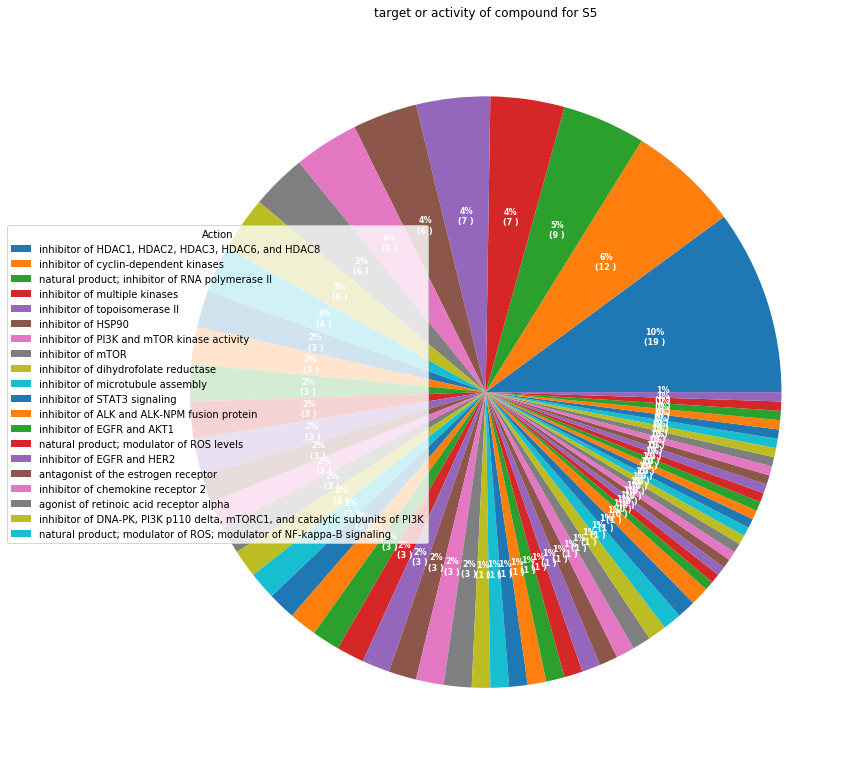

<Figure size 432x288 with 0 Axes>

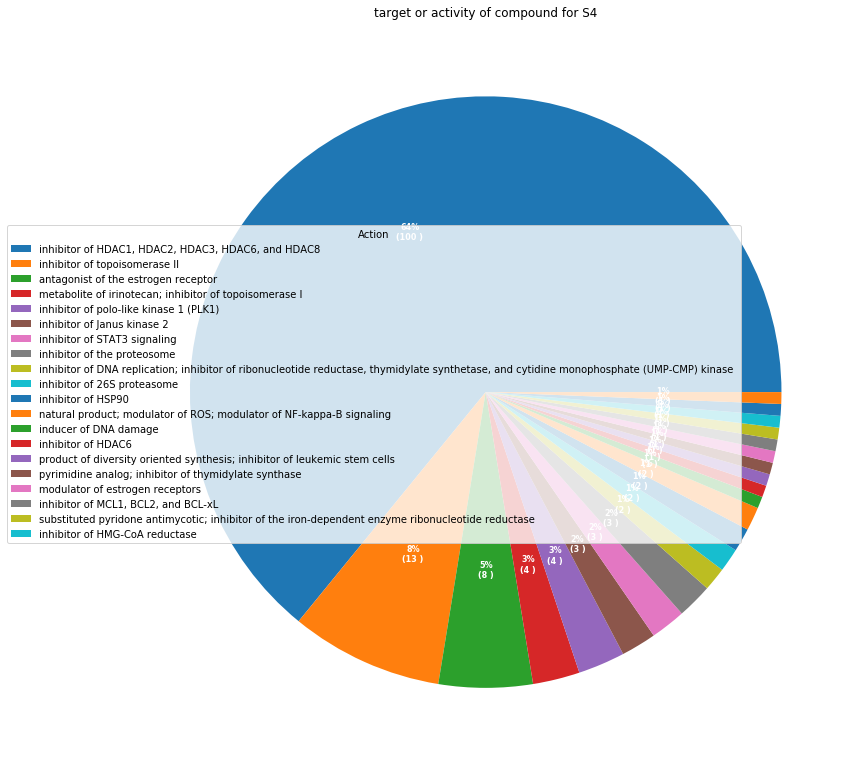

<Figure size 432x288 with 0 Axes>

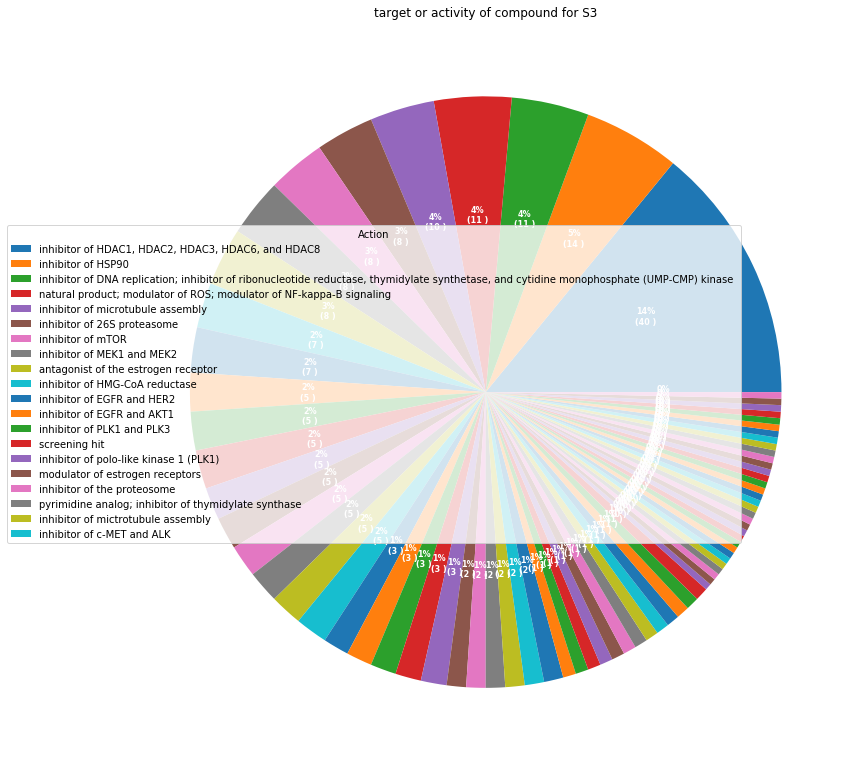

<Figure size 432x288 with 0 Axes>

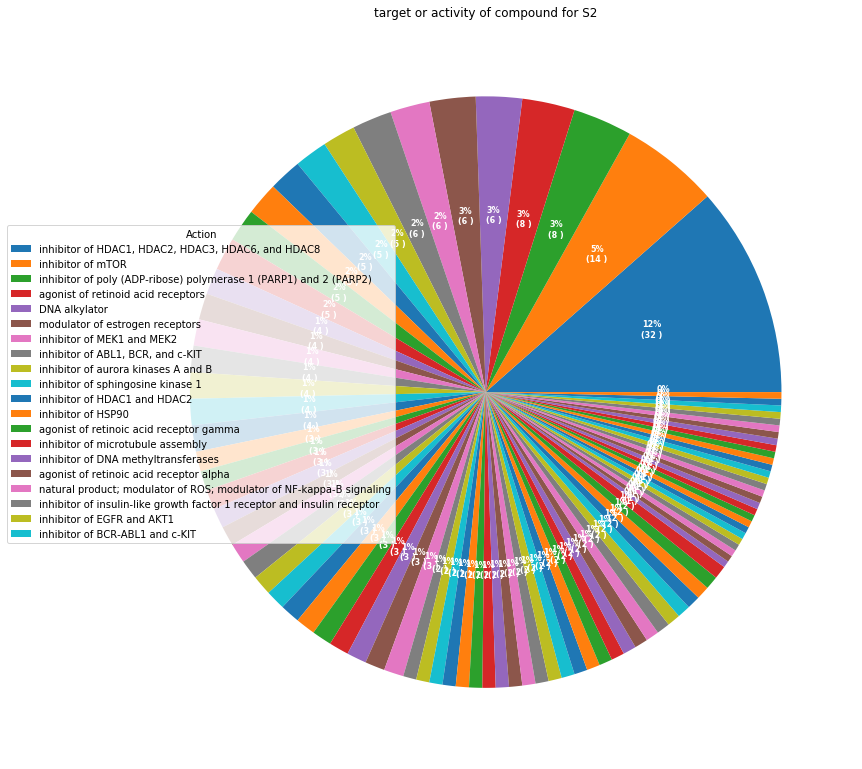

<Figure size 432x288 with 0 Axes>

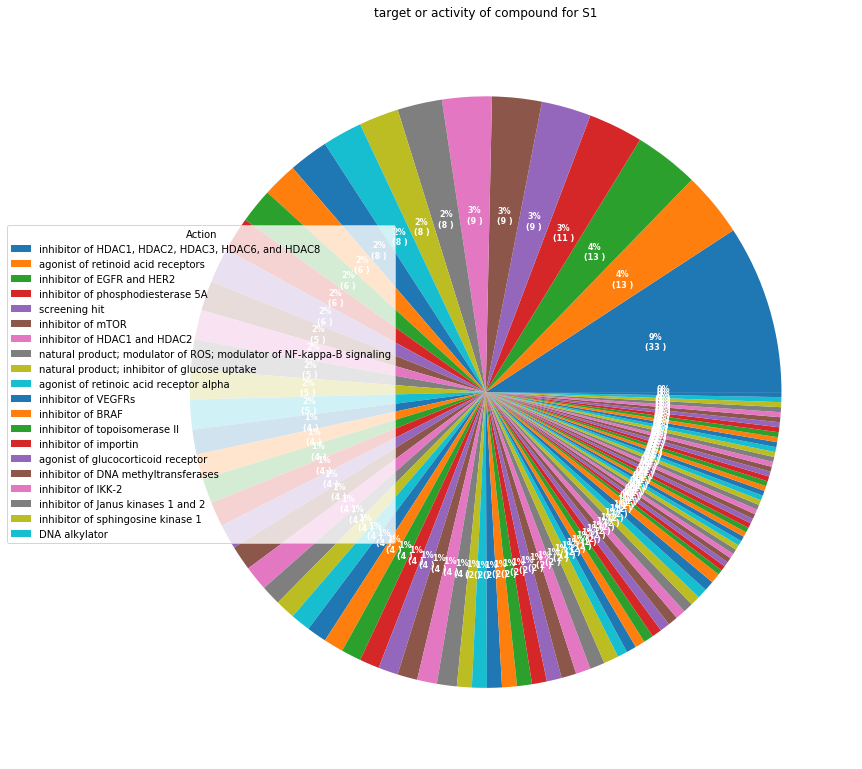

<Figure size 432x288 with 0 Axes>

In [94]:
drug_catogory_S5 = annotation_drugAction("S5")
drug_catogory_S4 = annotation_drugAction("S4")
drug_catogory_S3 = annotation_drugAction("S3")
drug_catogory_S2 = annotation_drugAction("S2")
drug_catogory_S1 = annotation_drugAction("S1")

In [95]:
def annotation_drugAction_1(state):
    drug_meta = pd.read_csv((os.path.join(ROOT_DIR, "Dataset/CTRP2/v20.meta.per_compound.txt")), sep='\t')
    dic_drug = {}
    drugName = drug_meta['cpd_name']
    target_or_activity_of_compound = drug_meta['target_or_activity_of_compound']

    for i in range(0, len(drugName)):
        dic_drug[drugName[i]] = target_or_activity_of_compound[i]

    cur_list = []
    for drug in dic_state_drug[state]:
        if drug in dic_drug:
            cur_list.append(dic_drug[drug])

    category = list(set(cur_list))
    count = []
    for item in category:
        count.append(cur_list.count(item))
    drug_catogory = pd.DataFrame({"target_or_activity_of_compound":category, "Count":count})

    drug_catogory.index = drug_catogory['target_or_activity_of_compound'].values
    drug_catogory = drug_catogory.sort_values(by = ['Count'],ascending=False)
    
    #drug_catogory = drug_catogory.sort_values(by = ['Count'],ascending=False)
    
    return(drug_catogory)


In [96]:
def action_enrich(sele, dic_state_drug):
    sele_df = annotation_drugAction_1(sele)
    p_list = []
    states_list = list(dic_state_drug.keys())
    Num_all = []
    for state in states_list:
        Num_all.append(np.sum(annotation_drugAction_1(state)['Count'].values))
        
    for i in range(0, sele_df.shape[0]):
        action_sele =sele_df.index.values[i]
        Num_sele = []
        for state in states_list:
            if action_sele in annotation_drugAction_1(state).index.values:
                Num_sele.append(annotation_drugAction_1(state).loc[action_sele]['Count'])
            else:
                Num_sele.append(0)
        x = pd.DataFrame({"State":states_list,"sele_Count":Num_sele,"all_Count": Num_all})
        A = x.loc[x['State']==sele]['sele_Count'].values[0]
        B = np.sum(x['sele_Count']) - A
        C = x.loc[x['State']==sele]['all_Count'].values[0] - A
        D = np.sum(x['all_Count']) - B - C + A        
        f,p = scipy.stats.fisher_exact([[A,B],[C,D]], alternative= 'greater')
        p_list.append(p)
    FDR = stats.multitest.multipletests(p_list, alpha=0.05, method='hs', is_sorted=False, returnsorted=False)
    result_enrich = pd.DataFrame({'action':sele_df.index.values, 'p':p_list, 'FDR':FDR[1]})
    result_enrich_sig = result_enrich.loc[result_enrich['FDR'] < 0.05]
    
    return(result_enrich_sig)

In [97]:
def plot_enrich_actions(sele,dic_state_drug):
    result_enrich_sig = action_enrich(sele,dic_state_drug)
    result_enrich_sig_temp = result_enrich_sig
    FDR_list = []
    for value in (result_enrich_sig_temp['FDR']):
        if (value) < 1e-6:
            FDR_list.append(1e-6)
        else:
            FDR_list.append(value)
    
    result_enrich_sig['-log10FDR'] = -1 * np.log10(FDR_list)
    
    print("Notice: if FDR is smaller than 1e-6, we set it to 1e-6")
    result_enrich_sig_sort = result_enrich_sig.sort_values(by = ['FDR'], ascending = False )

    ylist = result_enrich_sig_sort['-log10FDR']
    states = result_enrich_sig_sort['action']

    import matplotlib.pyplot as plt
    plt.figure(num=None, figsize=(8, 2), dpi=300, facecolor='w', edgecolor='k')
    y_pos = np.arange(len(ylist))
    plt.barh(y_pos,ylist, align='center', alpha=0.9,color='grey')
    plt.tick_params(labelsize=12)
    plt.yticks(y_pos, states)
    plt.xlabel('-log10FDR')
    plt.title(sele)
    plt.tight_layout()
    plt.savefig(output_dir+'/' +sele+'enrich_action.png', dpi=300)
    plt.show()
    
    return(result_enrich_sig_sort)



Notice: if FDR is smaller than 1e-6, we set it to 1e-6


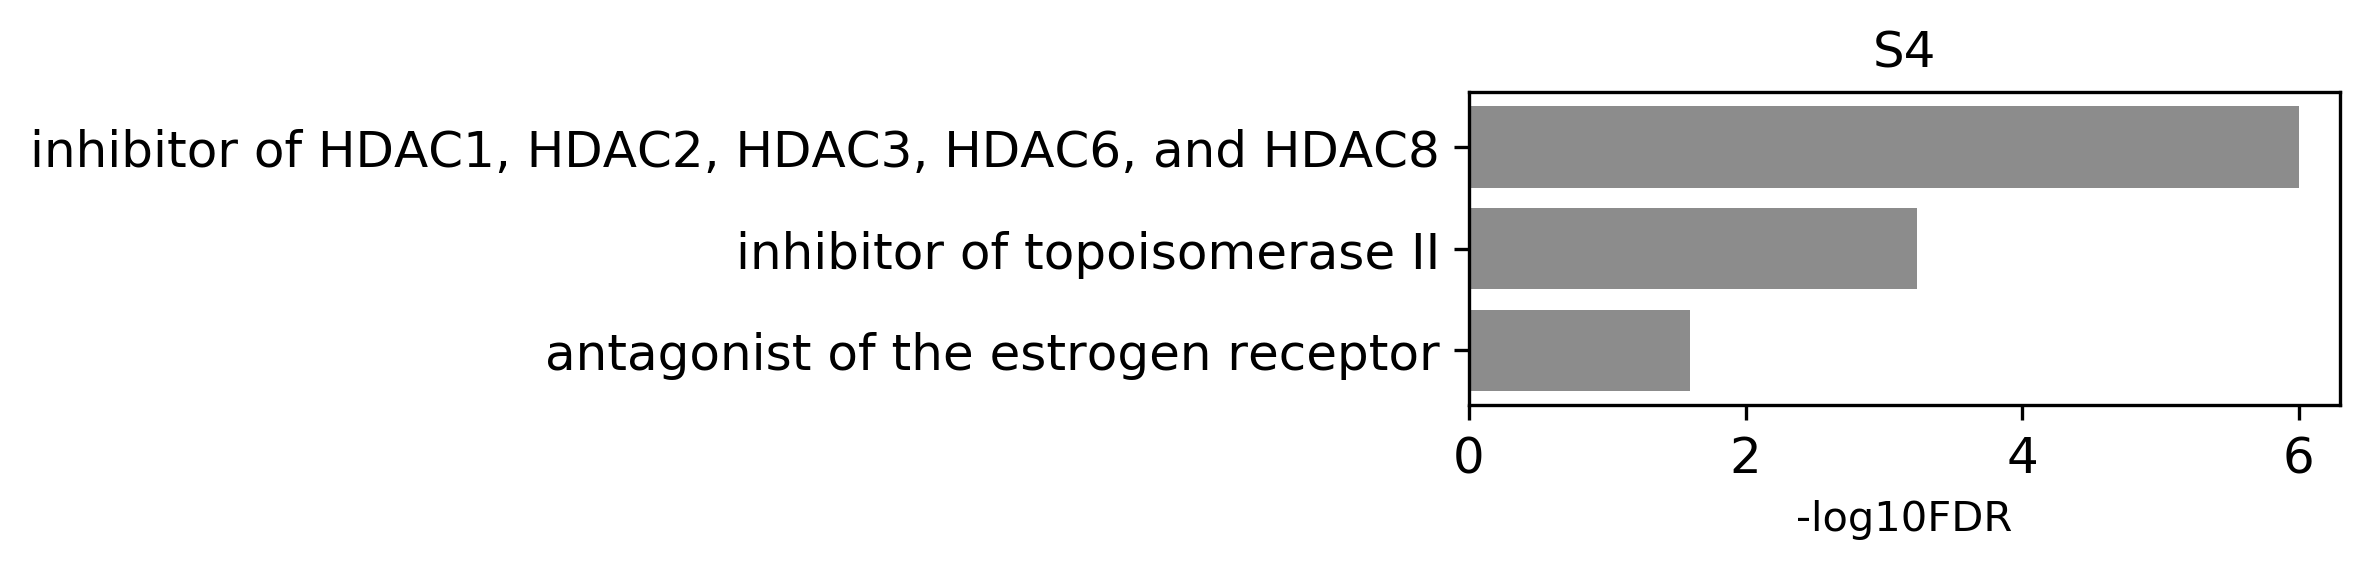

,action,p,FDR,-log10FDR
2,antagonist of the estrogen receptor,1.272582e-03,0.025146,1.599526
1,inhibitor of topoisomerase II,2.717629e-05,0.000571,3.243709
0,"inhibitor of HDAC1, HDAC2, HDAC3, HDAC6, and H...",1.245986e-51,0.000000,6.000000


In [98]:
plot_enrich_actions('S4',dic_state_drug)

Notice: if FDR is smaller than 1e-6, we set it to 1e-6


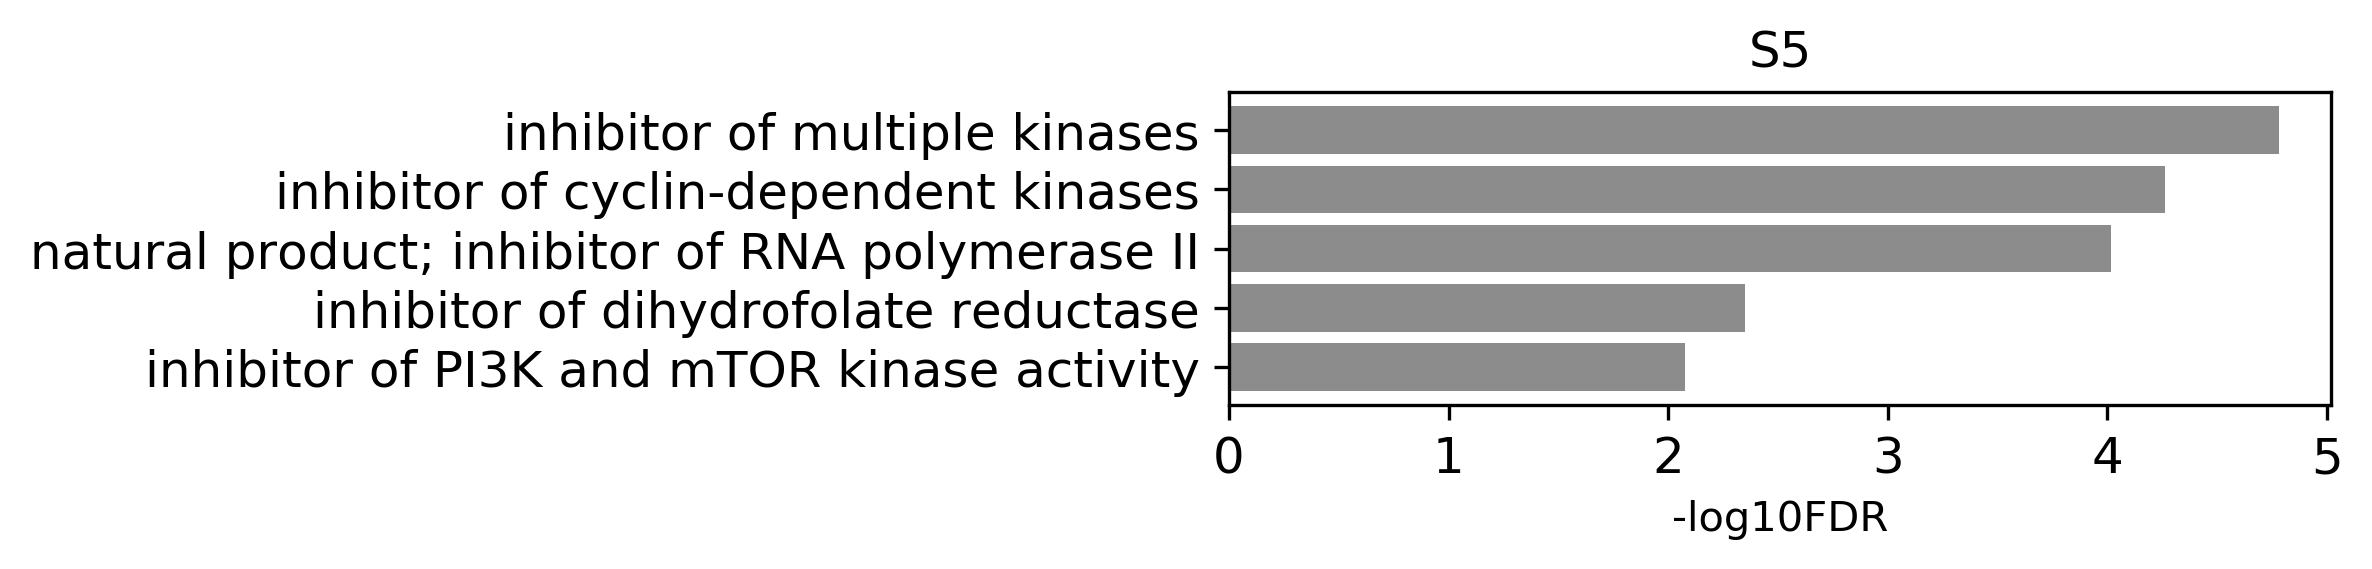

,action,p,FDR,-log10FDR
6,inhibitor of PI3K and mTOR kinase activity,1.383209e-04,0.008403,2.075583
8,inhibitor of dihydrofolate reductase,7.245136e-05,0.004482,2.348521
2,natural product; inhibitor of RNA polymerase II,1.532496e-06,0.000097,4.015281
1,inhibitor of cyclin-dependent kinases,8.509461e-07,0.000054,4.263930
3,inhibitor of multiple kinases,2.548368e-07,0.000017,4.780828


In [99]:
plot_enrich_actions('S5',dic_state_drug)

Notice: if FDR is smaller than 1e-6, we set it to 1e-6


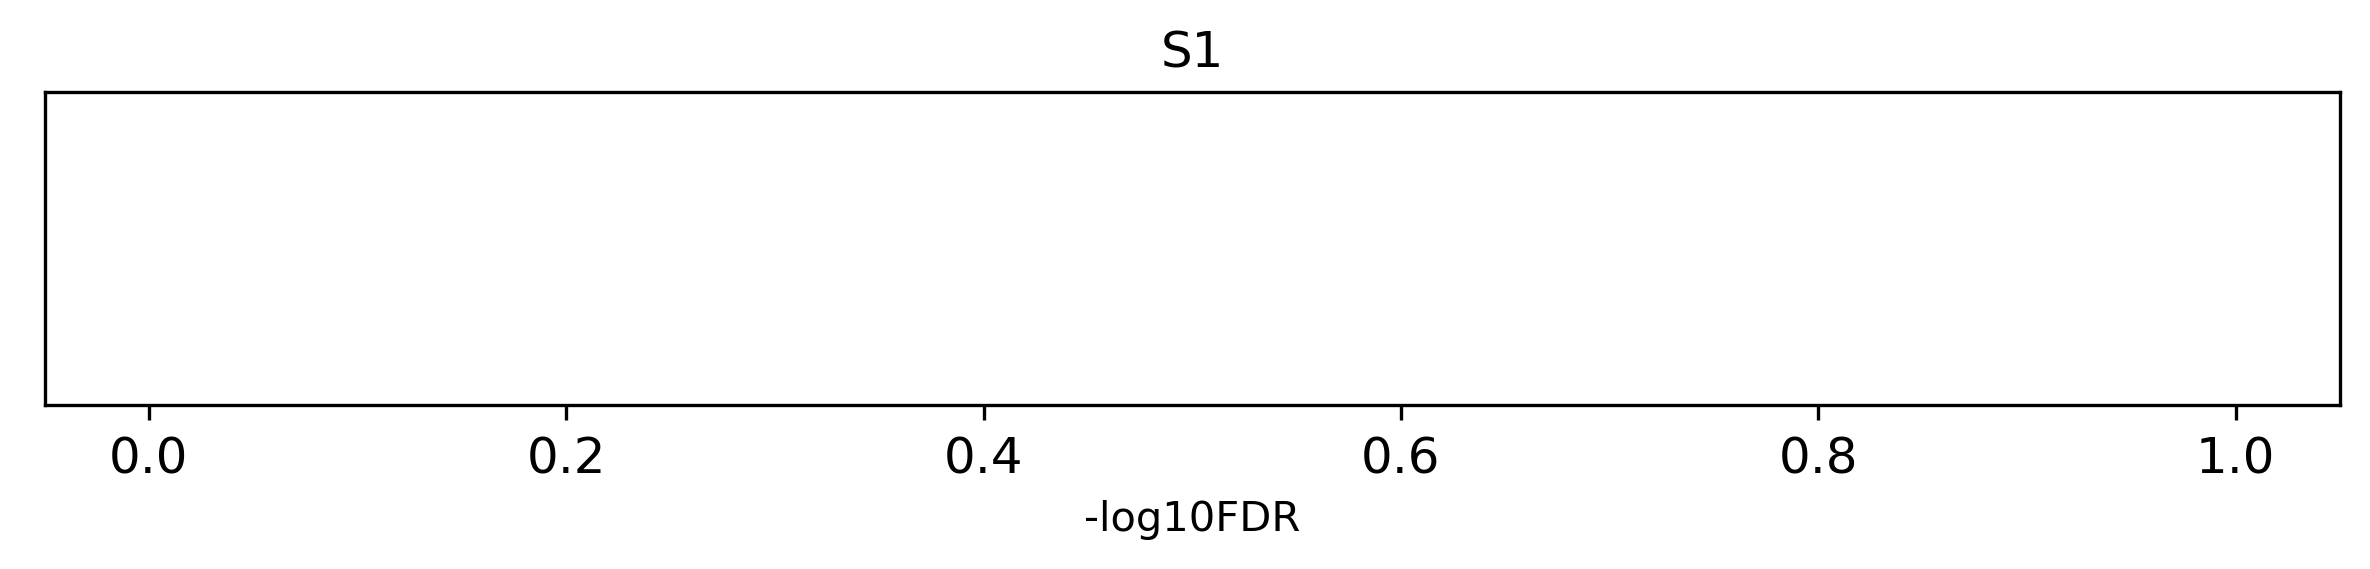

,action,p,FDR,-log10FDR


In [100]:
plot_enrich_actions('S1',dic_state_drug)

Notice: if FDR is smaller than 1e-6, we set it to 1e-6


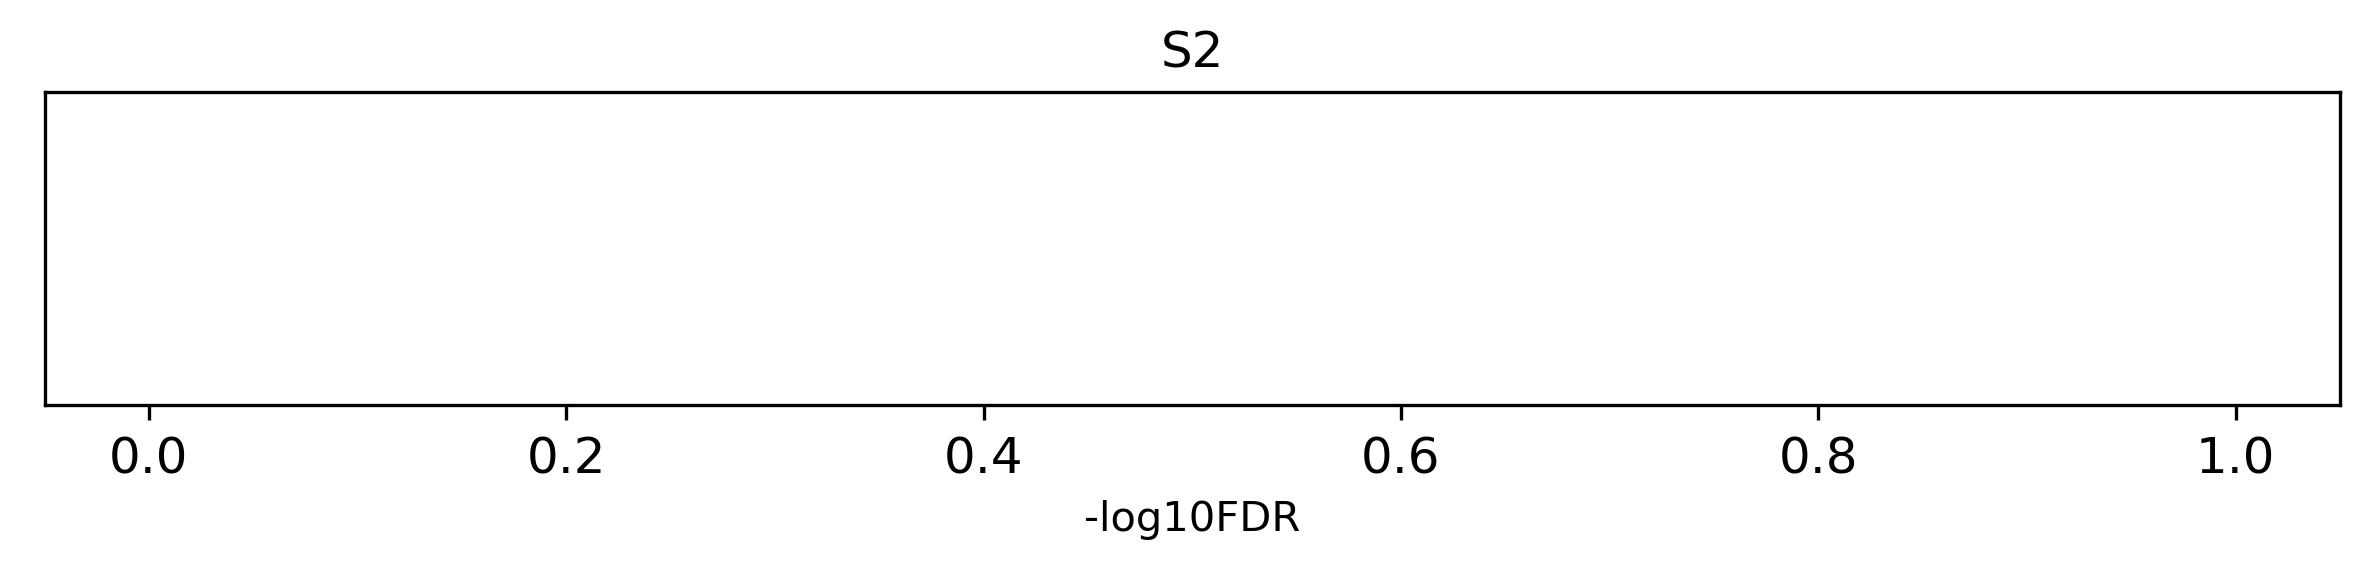

,action,p,FDR,-log10FDR


In [101]:
plot_enrich_actions('S2',dic_state_drug)

Notice: if FDR is smaller than 1e-6, we set it to 1e-6


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:27: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


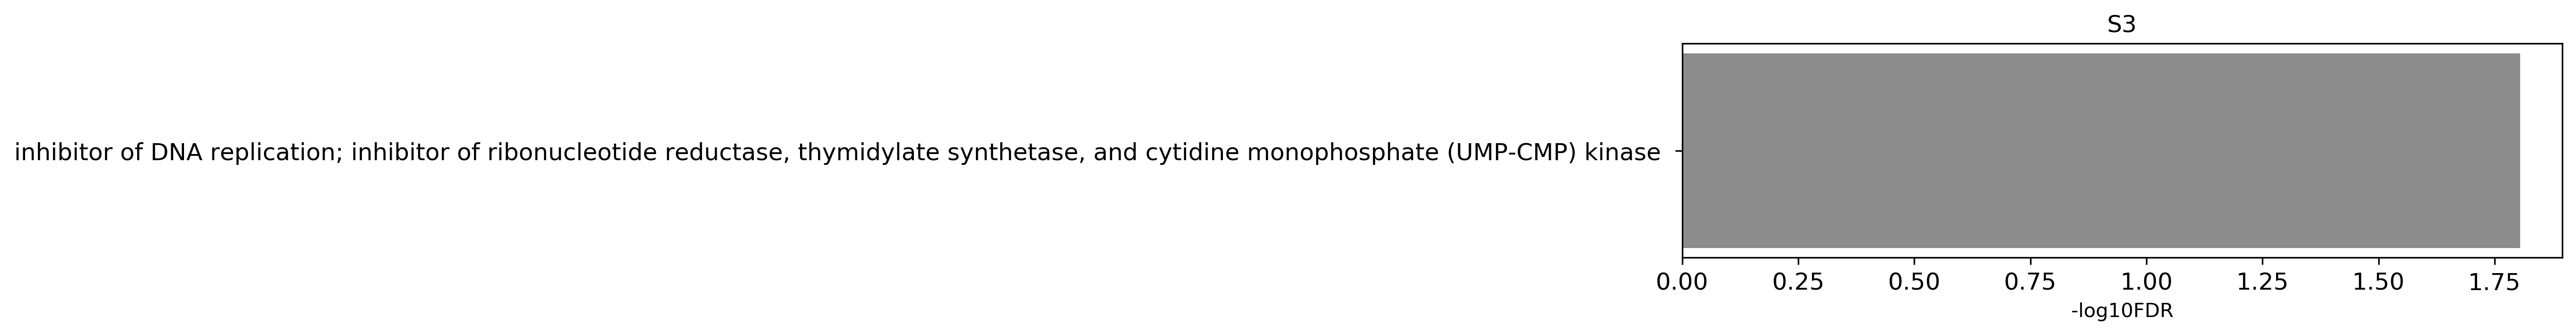

,action,p,FDR,-log10FDR
2,inhibitor of DNA replication; inhibitor of rib...,0.000205,0.015648,1.805546


In [102]:
plot_enrich_actions('S3',dic_state_drug)

#### End of state annotation using drug targets. For more annotation about transcriptional factors or drug concentration, please check Example1_annotation_tf.ipynb and Example1_annotation_drugResponse.